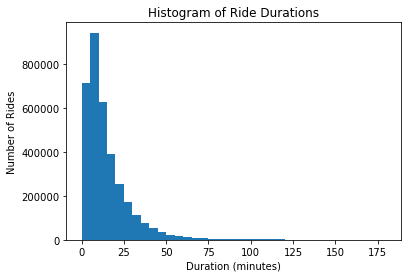

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load the dataset
df = pd.read_csv('202207-citbike-tripdata.csv')

# Convert start and end times to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate duration in minutes
df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Filter out rides longer than 3 hours
df = df[df['duration_min'] <= 180]

# Plot histogram of ride durations
plt.hist(df['duration_min'], bins=range(0, 181, 5))  # Bins of 5 minutes up to 3 hours
plt.title('Histogram of Ride Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Rides')
plt.show()


In [2]:
# Average ride duration
average_duration = df['duration_min'].mean()

# Empirical variance of ride duration
variance_duration = df['duration_min'].var()

# Probability that a ride duration is greater than 20 minutes
prob_over_20 = (df['duration_min'] > 20).mean()

# ... [code to calculate average_duration and variance_duration] ...

print(f"Average ride duration: {average_duration} minutes")
print(f"Variance of ride duration: {variance_duration} minutes^2")

# ... [code to calculate prob_over_20] ...

print(f"Probability that a ride is longer than 20 minutes: {prob_over_20 * 100}%")


Average ride duration: 14.993437534823697 minutes
Variance of ride duration: 232.83326395736216 minutes^2
Probability that a ride is longer than 20 minutes: 23.27159298142911%


In [3]:
# Filter for CitiBike members
df_members = df[df['member_casual'] == 'member']

# Probability for members
prob_over_20_members = (df_members['duration_min'] > 20).mean()

# ... [code to calculate prob_over_20_members] ...

print(f"Probability that a ride is longer than 20 minutes for CitiBike members: {prob_over_20_members * 100}%")



Probability that a ride is longer than 20 minutes for CitiBike members: 18.60857895918635%


In [4]:
# Probability of being a member given the ride is more than 25min
prob_member_given_over_25 = df[df['duration_min'] > 25]['member_casual'].eq('member').mean()

# ... [code to calculate prob_member_given_over_25] ...

print(f"Probability that a ride longer than 25 minutes belongs to a CitiBike member: {prob_member_given_over_25 * 100}%")



Probability that a ride longer than 25 minutes belongs to a CitiBike member: 58.39272451304628%


In [5]:
# Expected ride duration for electric bike
expected_duration_ebike = df[df['rideable_type'] == 'electric_bike']['duration_min'].mean()

# Expected ride duration for classic bike
expected_duration_classic = df[df['rideable_type'] == 'classic_bike']['duration_min'].mean()


# ... [code to calculate expected_duration_ebike and expected_duration_classic] ...

print(f"Expected ride duration for an electric bike: {expected_duration_ebike} minutes")
print(f"Expected ride duration for a classic bike: {expected_duration_classic} minutes")


Expected ride duration for an electric bike: 15.170246092604836 minutes
Expected ride duration for a classic bike: 14.731185819813849 minutes


In [6]:
# Filter for rides less than 10 minutes
df_under_10 = df[df['duration_min'] < 10]

# Probability that a ride uses an electric bike for rides less than 10min
prob_ebike_under_10 = (df_under_10['rideable_type'] == 'electric_bike').mean()

# Probability that a ride uses a classic bike for rides less than 10min
prob_classic_under_10 = (df_under_10['rideable_type'] == 'classic_bike').mean()
# ... [code to calculate prob_ebike_under_10 and prob_classic_under_10] ...

print(f"Probability that a ride less than 10 minutes uses an electric bike: {prob_ebike_under_10 * 100}%")
print(f"Probability that a ride less than 10 minutes uses a classic bike: {prob_classic_under_10 * 100}%")

# Comment on the results after examining the outputted probabilities.


Probability that a ride less than 10 minutes uses an electric bike: 23.37948674855104%
Probability that a ride less than 10 minutes uses a classic bike: 76.34731679242329%


In [11]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Filter for weekdays only
df = df[df['started_at'].dt.weekday < 5]

In [12]:
selected_stations = ['5329.03', '6364.07', '5905.12']
df_selected = df[df['start_station_id'].isin(selected_stations) | df['end_station_id'].isin(selected_stations)]

In [26]:
# Discretize time blocks into intervals (e.g., 10 minutes)
time_interval = timedelta(minutes=10)  # Change this to 5 if you prefer 5-minute intervals

# Create a new column for time blocks
df_selected['time_block'] = df_selected['started_at'].dt.floor('10T') # Adjust '10T' to '5T' if using 5-minute intervals
df_selected

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min,time_block
172794,301E3B8C0C45B16C,classic_bike,2022-07-29 17:14:16,2022-07-29 18:26:33,W 34 St & 11 Ave,6578.01,Broadway & E 14 St,5905.12,40.755942,-74.002116,40.734546,-73.990741,member,72.283333,2022-07-29 17:10:00
189138,6AF9A7467DE20C11,electric_bike,2022-07-26 14:16:12,2022-07-26 14:53:52,Washington Pl & Broadway,5755.01,Broadway & E 14 St,5905.12,40.729039,-73.994046,40.734546,-73.990741,member,37.666667,2022-07-26 14:10:00
189139,8306E9183C2B9895,classic_bike,2022-07-12 08:31:47,2022-07-12 08:42:30,W 26 St & 8 Ave,6297.02,Broadway & E 14 St,5905.12,40.747348,-73.997236,40.734546,-73.990741,member,10.716667,2022-07-12 08:30:00
189150,C25BAF7A6BE15BAE,classic_bike,2022-07-27 20:06:08,2022-07-27 20:29:37,E 51 St & 2 Ave,6575.03,Broadway & E 14 St,5905.12,40.755293,-73.967641,40.734546,-73.990741,member,23.483333,2022-07-27 20:00:00
189167,D4BDD9CA12EA5DD3,electric_bike,2022-07-01 14:34:51,2022-07-01 14:50:39,W 55 St & 6 Ave,6809.09,Broadway & E 14 St,5905.12,40.763189,-73.978434,40.734546,-73.990741,member,15.800000,2022-07-01 14:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075627,21E98491317CF3B2,classic_bike,2022-07-01 23:10:06,2022-07-01 23:18:59,6 Ave & W 33 St,6364.07,E 25 St & 1 Ave,6004.07,40.749013,-73.988484,40.738177,-73.977387,casual,8.883333,2022-07-01 23:10:00
3075631,7AF4547D917ECF29,classic_bike,2022-07-22 22:02:10,2022-07-22 22:14:25,6 Ave & W 33 St,6364.07,E 10 St & 2 Ave,5746.02,40.749013,-73.988484,40.729708,-73.986598,casual,12.250000,2022-07-22 22:00:00
3075634,DFD387ED59B4E900,classic_bike,2022-07-22 22:45:45,2022-07-22 22:55:37,6 Ave & W 33 St,6364.07,E 25 St & 1 Ave,6004.07,40.749013,-73.988484,40.738177,-73.977387,casual,9.866667,2022-07-22 22:40:00
3075637,03709B1C9F93D77B,docked_bike,2022-07-25 22:31:16,2022-07-25 22:57:12,6 Ave & W 33 St,6364.07,E 10 St & 2 Ave,5746.02,40.749013,-73.988484,40.729708,-73.986598,casual,25.933333,2022-07-25 22:30:00


In [31]:
def calculate_transition_matrix(df, station_id, interval='10T', max_capacity=30):
    n_states = max_capacity + 1
    transition_matrix = np.zeros((n_states, n_states))

    # Adjust the grouping based on your dataset's column names
    grouped = df.groupby([pd.Grouper(key='started_at', freq=interval),
                          'start_station_id',
                          'end_station_id'])

    # Debugging counters
    total_groups = 0
    non_empty_groups = 0

    for _, group in grouped:
        total_groups += 1

        bikes_out = group[group['start_station_id'] == station_id].shape[0]
        bikes_in = group[group['end_station_id'] == station_id].shape[0]

        if bikes_out > 0 or bikes_in > 0:
            non_empty_groups += 1

        current_state = max_capacity // 2  # Simplification

        new_state = max(0, min(max_capacity, current_state - bikes_out + bikes_in))
        transition_matrix[current_state, new_state] += 1

    row_sums = transition_matrix.sum(axis=1)
    transition_matrix = np.divide(transition_matrix, row_sums[:, np.newaxis],
                                  out=np.zeros_like(transition_matrix),
                                  where=row_sums[:, np.newaxis] != 0)

    print(f"Total groups processed: {total_groups}")
    print(f"Non-empty groups: {non_empty_groups}")

    return transition_matrix

# Example usage
# station_id = your_station_id
# transition_matrix = calculate_transition_matrix(df_selected, station_id)
transition_matrix_station1 = calculate_transition_matrix(df_selected, selected_stations[0])
transition_matrix_station1

Total groups processed: 24008
Non-empty groups: 7412


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       

In [24]:
def compute_stationary_distribution(transition_matrix, tol=1e-6, max_iter=1000):
    n = transition_matrix.shape[0]
    # Start with a uniform distribution
    distribution = np.full(n, 1/n)

    for _ in range(max_iter):
        new_distribution = distribution.dot(transition_matrix)
        
        # Check if it has converged
        if np.allclose(new_distribution, distribution, atol=tol):
            return new_distribution

        distribution = new_distribution

    return distribution

# Example usage
stationary_distribution = compute_stationary_distribution(transition_matrix_station1)
